## Keras MobileNet V1 classifier

Weather dataset credits : Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, v1 http://dx.doi.org/10.17632/4drtyfjtfy.1 

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path = '/content/drive/My Drive/datasets/weather-dataset/partition'
filepath = '/content/drive/My Drive/datasets/weather-dataset/weather/'

len(glob.glob(filepath + "*.jpg"))

if os.path.isdir(path) is False:
  os.makedirs(path + '/train/cloudy')
  os.makedirs(path + '/train/rain')
  os.makedirs(path + '/train/shine')
  os.makedirs(path + '/train/sunrise')
  os.makedirs(path + '/valid/cloudy')
  os.makedirs(path + '/valid/rain')
  os.makedirs(path + '/valid/shine')
  os.makedirs(path + '/valid/sunrise')
  os.makedirs(path + '/test/cloudy')
  os.makedirs(path + '/test/rain')
  os.makedirs(path + '/test/shine')
  os.makedirs(path + '/test/sunrise')

  for i in random.sample(glob.glob(filepath + "cloudy*.jpg"), 120):
    shutil.move(i, path + '/train/cloudy/')
  for i in random.sample(glob.glob(filepath + "rain*.jpg"), 120):
    shutil.move(i, path + '/train/rain/')
  for i in random.sample(glob.glob(filepath + "shine*.jpg"), 120):
    shutil.move(i, path + '/train/shine/')
  for i in random.sample(glob.glob(filepath + "sunrise*.jpg"), 120):
    shutil.move(i, path + '/train/sunrise/')
  for i in random.sample(glob.glob(filepath + "cloudy*.jpg"), 30):
    shutil.move(i, path + '/valid/cloudy/')
  for i in random.sample(glob.glob(filepath + "rain*.jpg"), 30):
    shutil.move(i, path + '/valid/rain/')
  for i in random.sample(glob.glob(filepath + "shine*.jpg"), 30):
    shutil.move(i, path + '/valid/shine/')
  for i in random.sample(glob.glob(filepath + "sunrise*.jpg"), 30):
    shutil.move(i, path + '/valid/sunrise/')
  for i in random.sample(glob.glob(filepath + "cloudy*.jpg"), 30):
    shutil.move(i, path + '/test/cloudy/')
  for i in random.sample(glob.glob(filepath + "rain*.jpg"), 30):
    shutil.move(i, path + '/test/rain/')
  for i in random.sample(glob.glob(filepath + "shine*.jpg"), 30):
    shutil.move(i, path + '/test/shine/')
  for i in random.sample(glob.glob(filepath + "sunrise*.jpg"), 30):
    shutil.move(i, path + '/test/sunrise/')
  

In [14]:
train_path = path + '/train'
valid_path = path + '/valid'
test_path = path + '/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
                  .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
                  .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)  \
                  .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 480 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [15]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [16]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [17]:
x = mobile.layers[-6].output
predictions = Dense(4, activation='softmax')(x)

#### Total trainable parameters is decreased from the original MobileNet 4.2 million to about 2.67 million parameters in succession.

In [18]:
model = Model(inputs=mobile.input, outputs=predictions)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [20]:
for layer in model.layers[:-36]:
  layer.trainable = False

In [69]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [21]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

#### Training the model with 90 epochs seems like an overkill but the training set is limited as well.

In [22]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, validation_steps=len(valid_batches), epochs=90, verbose=2)

Epoch 1/90
48/48 - 183s - loss: 0.8187 - accuracy: 0.6875 - val_loss: 0.5163 - val_accuracy: 0.8167
Epoch 2/90
48/48 - 6s - loss: 0.2213 - accuracy: 0.9187 - val_loss: 0.1854 - val_accuracy: 0.9583
Epoch 3/90
48/48 - 6s - loss: 0.1165 - accuracy: 0.9812 - val_loss: 0.1700 - val_accuracy: 0.9417
Epoch 4/90
48/48 - 6s - loss: 0.0914 - accuracy: 0.9812 - val_loss: 0.1248 - val_accuracy: 0.9833
Epoch 5/90
48/48 - 6s - loss: 0.0563 - accuracy: 0.9937 - val_loss: 0.1135 - val_accuracy: 0.9833
Epoch 6/90
48/48 - 6s - loss: 0.0338 - accuracy: 0.9979 - val_loss: 0.1039 - val_accuracy: 0.9833
Epoch 7/90
48/48 - 6s - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9833
Epoch 8/90
48/48 - 6s - loss: 0.0257 - accuracy: 0.9979 - val_loss: 0.0928 - val_accuracy: 0.9833
Epoch 9/90
48/48 - 6s - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9833
Epoch 10/90
48/48 - 6s - loss: 0.0319 - accuracy: 0.9937 - val_loss: 0.0948 - val_accuracy: 0.9667
Epoch 11/90
48/48

In [24]:
test_labels = test_batches.classes

In [25]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

12/12 [==============================] - 31s 3s/step


In [26]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [67]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix without Normalization')

  print(cm)

  thresh  = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

In [32]:
test_batches.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [64]:
cm_plot_labels = list(test_batches.class_indices.keys())

In [65]:
cm_plot_labels

['cloudy', 'rain', 'shine', 'sunrise']

Confusion Matrix without Normalization
[[24  0  4  2]
 [ 0 30  0  0]
 [ 1  0 29  0]
 [ 0  0  0 30]]


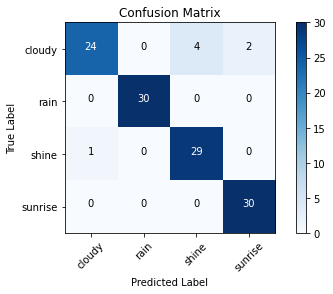

In [68]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

In [72]:
accuracy_score(test_labels, predictions.argmax(axis=1))

0.9416666666666667

#### It seems the model trained very well as the accuracy is 94%.